In [1]:
import numpy as np
import os 

def reset_graph(seed =2):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12


In [2]:
import tensorflow as tf
x = tf.Variable(3,name = 'x')
y = tf.Variable(4,name = 'y')
f = x*x*y + y +2

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
f

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [4]:
## way1
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)

In [5]:
print(result)
sess.close()

42


In [6]:
# way2
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result=f.eval()
print(result)


42


In [7]:
init = tf.global_variables_initializer()
sess =tf.InteractiveSession()
init.run()
result= f.eval()
print(result)
sess.close()

42


Managing graphs`

In [8]:
reset_graph()

In [9]:
x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [10]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)
x2.graph is graph


True

In [11]:
x2.graph is tf.get_default_graph()

False

In [12]:
w = tf.constant(3)
x =w+2
y=x+5
z=x*3
with tf.Session() as sess:
    print(y.eval())
    print(z.eval())

10
15


In [13]:
with tf.Session() as sess:
    y_val, z_val = sess.run([y,z])
    print(y_val)
    print(z_val)

10
15


线性回归

In [14]:
import numpy as np
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
m,n  = housing.data.shape


In [15]:
housing_data_plus_bias =np.c_[np.ones((m,1)),housing.data]
X = tf.constant(housing_data_plus_bias,dtype = tf.float32,name = 'X')
y = tf.constant(housing.target.reshape(-1,1),dtype = tf.float32,name ='y')
XT = tf.transpose(X)
theta =tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,X)),XT),y)
with tf.Session() as sess:
    theta_value = theta.eval()
print(theta_value)

[[-3.7185181e+01]
 [ 4.3633747e-01]
 [ 9.3952334e-03]
 [-1.0711310e-01]
 [ 6.4479220e-01]
 [-4.0338000e-06]
 [-3.7813708e-03]
 [-4.2348403e-01]
 [-4.3721911e-01]]


In [16]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
housing= fetch_california_housing()
m,n = housing.data.shape
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m,1)),scaled_housing_data]
# housing_data_plus_bias = np.c_[np.ones((m,1)),housing.data]
# scaled_houing_data_plus_bias =scale(housing_data_plus_bias)


In [17]:
print(scaled_housing_data_plus_bias.mean(axis=0))
print(scaled_housing_data_plus_bias.mean(axis=1))
print(scaled_housing_data_plus_bias.mean())
print(scaled_housing_data_plus_bias.shape)


[ 1.00000000e+00  6.60969987e-17  5.50808322e-18  6.60969987e-17
 -1.06030602e-16 -1.10161664e-17  3.44255201e-18 -1.07958431e-15
 -8.52651283e-15]
[ 0.38915536  0.36424355  0.5116157  ... -0.06612179 -0.06360587
  0.01359031]
0.11111111111111005
(20640, 9)


In [18]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01 
X = tf.constant(scaled_housing_data_plus_bias,dtype = tf.float32,name = 'X')
y = tf.constant(housing.target.reshape(-1,1),dtype = tf.float32,name = 'y')
theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0),name = 'theta')
#random_uniform()函数在图形中创建一个节点，它将生成包含随机值的张量，给定其形状和值作用域，就像 NumPy 的rand()函数一样。
y_pred = tf.matmul(X,theta,name='predictions') ## 计算预测值
error = y_pred-y   # 计算误差
mse = tf.reduce_mean(tf.square(error),name = 'mse') ## 均方误差
gradients = 2/m*tf.matmul(tf.transpose(X),error)   ##梯度下降公式
training_op = tf.assign(theta,theta-learning_rate*gradients)
#assign()函数创建一个为变量分配新值的节点。 在这种情况下，它实现了批次梯度下降步骤 
#\theta(next step)= \theta - \eta  \nabla_{\theta}MSE(\theta)。
init = tf.global_variables_initializer()  ## 初始值
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch%100 ==0:
            print('Epoch',epoch,'MSE=',mse.eval())
        sess.run(training_op)
    best_theta = theta.eval()

Epoch 0 MSE= 8.142526
Epoch 100 MSE= 0.771174
Epoch 200 MSE= 0.6109866
Epoch 300 MSE= 0.58497435
Epoch 400 MSE= 0.56871593
Epoch 500 MSE= 0.5569848
Epoch 600 MSE= 0.5484222
Epoch 700 MSE= 0.54215634
Epoch 800 MSE= 0.5375616
Epoch 900 MSE= 0.5341845


In [19]:
best_theta

array([[ 2.0685523 ],
       [ 0.83593637],
       [ 0.14891674],
       [-0.2232562 ],
       [ 0.24690312],
       [ 0.00638799],
       [-0.04201252],
       [-0.6740518 ],
       [-0.64282006]], dtype=float32)

使用优化器

In [20]:

X = tf.constant(scaled_housing_data_plus_bias,dtype = tf.float32,name = 'X')
y = tf.constant(housing.target.reshape(-1,1),dtype = tf.float32,name = 'y')
theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0),name = 'theta')
#random_uniform()函数在图形中创建一个节点，它将生成包含随机值的张量，给定其形状和值作用域，就像 NumPy 的rand()函数一样。
y_pred = tf.matmul(X,theta,name='predictions') ## 计算预测值
error = y_pred-y   # 计算误差
mse = tf.reduce_mean(tf.square(error),name = 'mse') ## 均方误差
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate,)
training_op = optimizer.minimize(mse)
init = tf.global_variables_initializer()  ## 初始值
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch%100 ==0:
            print('Epoch',epoch,'MSE=',mse.eval())
        sess.run(training_op)
    best_theta = theta.eval()
print(best_theta)

Epoch 0 MSE= 10.315513
Epoch 100 MSE= 0.92430675
Epoch 200 MSE= 0.69249046
Epoch 300 MSE= 0.64293706
Epoch 400 MSE= 0.6100747
Epoch 500 MSE= 0.5864337
Epoch 600 MSE= 0.5693433
Epoch 700 MSE= 0.5569795
Epoch 800 MSE= 0.5480306
Epoch 900 MSE= 0.5415503
[[ 2.0685523 ]
 [ 0.73355085]
 [ 0.14359827]
 [-0.00385985]
 [ 0.05406804]
 [ 0.00578342]
 [-0.03937989]
 [-0.8089809 ]
 [-0.764577  ]]


In [21]:
reset_graph()
A = tf.placeholder(tf.float32,shape=(None,3))
B = A + 5
with tf.Session() as sess:
    B_val_1 = B.eval(feed_dict = {A:[[1,2,3]]})
    B_val_2 = B.eval(feed_dict = {A:[[4,5,6],[7,8,9]]})
print(B_val_1)
print(B_val_2)

[[6. 7. 8.]]
[[ 9. 10. 11.]
 [12. 13. 14.]]


MINI_BATCH 完整代码

In [22]:


from sklearn.preprocessing import scale
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


housing = fetch_california_housing()
m,n = housing.data.shape
print('数据集：{}行，{}列'.format(m,n))
housing_data_plus_bias = np.c_[np.ones((m,1)),housing.data]
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m,1)),scaled_housing_data]
# scaled_houing_data_plus_bias =scale(housing_data_plus_bias)
n_epochs = 10
batch_size =100
n_batchs = int(np.ceil(m/batch_size))
learning_rate = 0.01 
X = tf.placeholder(tf.float32,shape = (None,n+1),name = 'X')
y = tf.placeholder(tf.float32,shape = (None,1),name ='y')

theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0),name = 'theta')
#random_uniform()函数在图形中创建一个节点，它将生成包含随机值的张量，给定其形状和值作用域，就像 NumPy 的rand()函数一样。
y_pred = tf.matmul(X,theta,name='predictions') ## 计算预测值
error = y_pred-y   # 计算误差
mse = tf.reduce_mean(tf.square(error),name = 'mse') ## 均方误差
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate,)
training_op = optimizer.minimize(mse)
init = tf.global_variables_initializer()  ## 初始值
## 
saver = tf.train.Saver()

def fetch_batch(epoch,batch_index,batch_size):
    know = np.random.seed(epoch*n_batchs + batch_index)
#     print('我是know:',know)
    indices = np.random.randint(m,size = batch_size)
    X_batch = scaled_housing_data_plus_bias[indices]
    y_batch = housing.target.reshape(-1,1)[indices]
    return X_batch,y_batch


with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(n_batchs):
            X_batch,y_batch = fetch_batch(epoch,batch_index,batch_size)
            sess.run(training_op,feed_dict = {X:X_batch,y:y_batch})
    best_theta =theta.eval()
#     save_path = saver.save(sess,'C:\\Users\\Administrator\\Desktop\\my_model_final.ckpt')
print(best_theta)

数据集：20640行，8列
[[ 2.0699353 ]
 [ 0.82654804]
 [ 0.12407342]
 [-0.2272391 ]
 [ 0.30472216]
 [ 0.00610354]
 [-0.01348649]
 [-0.8570689 ]
 [-0.82038033]]


In [23]:
def my_func(a,b):
    z=0
    for i in range(100):
        z = a*np.cos(z+i) + z*np.sin(b-i)
    return z

In [24]:
my_func(0.2,0.3)

-0.21253923284754914

保存和恢复模型

In [25]:
# with tf.Session() as sess:
#     saver.restore(sess,'C:\\Users\\Administrator\\Desktop\\my_model_final.ckpt')

以下保存器将仅保存或恢复theta变量，它的键名称是weights：

In [26]:
saver = tf.train.Saver({'weights':theta})

使用 TensorBoard 展现图形和训练曲线

In [37]:
import tensorflow as tf
import tfgraphviz as tfg

# reset_graph()
a = tf.constant(1, name="a")
b = tf.constant(2, name="b")
c = tf.add(a, b, name="add")
# tfg.board(tf.get_default_graph())

In [28]:
from datetime import datetime
now = datetime.utcnow().strftime('%Y%m%d%H%M%S')
root_logidr = 'tf.logs'
logdir = '{}/run-{}/'.format(root_logidr,now)

In [29]:


from sklearn.preprocessing import scale
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import  tfgraphviz as tfg

housing = fetch_california_housing()
m,n = housing.data.shape
print('数据集：{}行，{}列'.format(m,n))
housing_data_plus_bias = np.c_[np.ones((m,1)),housing.data]
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m,1)),scaled_housing_data]
# scaled_houing_data_plus_bias =scale(housing_data_plus_bias)
n_epochs = 1000
batch_size =100
n_batchs = int(np.ceil(m/batch_size))
learning_rate = 0.01 
X = tf.placeholder(tf.float32,shape = (None,n+1),name = 'X')
y = tf.placeholder(tf.float32,shape = (None,1),name ='y')

theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0),name = 'theta')
#random_uniform()函数在图形中创建一个节点，它将生成包含随机值的张量，给定其形状和值作用域，就像 NumPy 的rand()函数一样。
y_pred = tf.matmul(X,theta,name='predictions') ## 计算预测值
error = y_pred-y   # 计算误差
mse = tf.reduce_mean(tf.square(error),name = 'mse') ## 均方误差
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate,)
training_op = optimizer.minimize(mse)
init = tf.global_variables_initializer()  ## 初始值
## 
saver = tf.train.Saver()

mse_summary = tf.summary.scalar('MSE',mse)
# file_writer = tf.summary.FileWriter(logdir,tf.get_default_graph())

def fetch_batch(epoch,batch_index,batch_size):
    know = np.random.seed(epoch*n_batchs + batch_index)
#     print('我是know:',know)
    indices = np.random.randint(m,size = batch_size)
    X_batch = scaled_housing_data_plus_bias[indices]
    y_batch = housing.target.reshape(-1,1)[indices]
    return X_batch,y_batch


with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(n_batchs):
            X_batch,y_batch = fetch_batch(epoch,batch_index,batch_size)
            if batch_index%10 ==0:
                summary_str = mse_summary.eval(feed_dict={X:X_batch,y:y_batch})
                step = epoch*n_batchs +batch_index
#                 file_writer.add_summary(summary_str,step)
            sess.run(training_op,feed_dict = {X:X_batch,y:y_batch})
    best_theta =theta.eval()

#     save_path = saver.save(sess,'C:\\Users\\Administrator\\Desktop\\my_model_final.ckpt')
print(best_theta)
# file_writer.close()


数据集：20640行，8列
[[ 2.0714476 ]
 [ 0.8462012 ]
 [ 0.11558535]
 [-0.26835832]
 [ 0.32982782]
 [ 0.00608358]
 [ 0.07052915]
 [-0.87988573]
 [-0.8634251 ]]


In [30]:
import os 
print(os.getcwd())

C:\Users\Administrator\Desktop\python 实现机器学习算法\Sklearn 和 Tensorflow


In [31]:
n_features =3
X = tf.placeholder(tf.float32,shape = (None,n_features),name = 'X')
w1 = tf.Variable(tf.random_normal((n_features,1)),name ='weights1')
w2 = tf.Variable(tf.random_normal((n_features,1)),name ='weights2')
b1 = tf.Variable(0.0,name='bias1')
b2 = tf.Variable(0.0,name='bias2')
z1=tf.add(tf.matmul(X,w1),b1,name ='z1')
z2=tf.add(tf.matmul(X,w2),b2,name ='z2')
relu1 = tf.maximum(z1,0,name ='relu1')
relu2 = tf.maximum(z2,0,name ='relu2')
output = tf.add(relu1,relu2,name='output')


In [32]:

def relu(X):
    w_shape = (int(X.get_shape()[1]),1)
    w = tf.Variable(tf.random_normal(w_shape),name = 'weights')
    b = tf.Variable(0.0,name='bias')
    z = tf.add(tf.matmul(X,w),b,name = 'z')
    return tf.maximum(z,0,name='relu')

In [33]:
n_features =3
X = tf.placeholder(tf.float32,shape=(None,n_features),name='X')
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus,name ='output')


12. Logistic Regression with Mini-Batch Gradient Descent using TensorFlow

In [34]:
from sklearn.datasets import make_moons
m =1000
X_moons,y_moons = make_moons(m,noise  =0.1,random_state = 42)

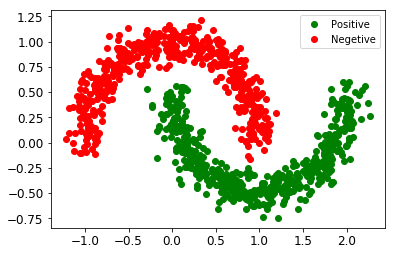

In [35]:
plt.plot(X_moons[y_moons==1,0],X_moons[y_moons==1,1],'go',label = 'Positive')
plt.plot(X_moons[y_moons==0,0],X_moons[y_moons==0,1],'ro',label = 'Negetive')
plt.legend()
plt.show()

In [74]:
X_moons_with_bias = np.c_[np.ones((m,1)),X_moons]

In [75]:
X_moons_with_bias[:6]

array([[ 1.        , -0.05146968,  0.44419863],
       [ 1.        ,  1.03201691, -0.41974116],
       [ 1.        ,  0.86789186, -0.25482711],
       [ 1.        ,  0.288851  , -0.44866862],
       [ 1.        , -0.83343911,  0.53505665],
       [ 1.        ,  0.61370557, -0.24236929]])

In [79]:
y_moons_column_vector = y_moons.reshape(-1,1)

In [80]:
test_ratio = 0.2
test_size = int(m*test_ratio)
X_train = X_moons_with_bias[:-test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

In [82]:
def random_batch(X_train,y_train,batch_size):
    rnd_indices = np.random.randint(0,len(X_train),batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch,y_batch

In [83]:
X_batch,y_batch = random_batch(X_train,y_train,5)
X_batch

array([[ 1.        ,  0.38886778, -0.31150772],
       [ 1.        ,  1.08162225,  0.06752551],
       [ 1.        ,  1.30399966, -0.54329461],
       [ 1.        ,  0.17055909, -0.24150851],
       [ 1.        ,  0.92232459,  0.45163988]])

In [84]:
reset_graph()

In [85]:
n_input = 2

In [87]:
X = tf.placeholder(tf.float32,shape=(None,n_input+1),name ='X')
y = tf.placeholder(tf.float32,shape = (None,1),name ='y')
theta = tf.Variable(tf.random_uniform([n_input+1,1],-1.0,1.0,seed =42),name = 'theta')
logits = tf.matmul(X,theta,name ='logits')
y_proba = 1/(1+tf.exp(-logits))

In [89]:
y_proba = tf.sigmoid(logits)

In [90]:
epsilon = 1e-7
loss = -tf.reduce_mean(y*tf.log(y_proba+epsilon)+(1-y)*tf.log(1-y_proba +epsilon))

In [91]:
loss = tf.losses.log_loss(y,y_proba)

In [93]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate= learning_rate)
training_op = optimizer.minimize(loss)

In [95]:
init = tf.global_variables_initializer()

In [100]:
n_spochs = 1000
batch_size = 50
n_batches = int(np.ceil(m/batch_size))

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch,y_batch = random_batch(X_train,y_train,batch_size)
            sess.run(training_op,feed_dict = {X:X_batch,y:y_batch})
        loss_val = loss.eval({X:X_test,y:y_test})
        if epoch %100 ==0:
            print('Epoch:',epoch,'\tLoss',loss_val)
    y_proba_val = y_proba.eval(feed_dict = {X:X_test,y:y_test})

Epoch: 0 	Loss 0.88129336
Epoch: 100 	Loss 0.32525185
Epoch: 200 	Loss 0.3000372
Epoch: 300 	Loss 0.28900236
Epoch: 400 	Loss 0.28290203
Epoch: 500 	Loss 0.27909532
Epoch: 600 	Loss 0.27724126
Epoch: 700 	Loss 0.2759253
Epoch: 800 	Loss 0.27476928
Epoch: 900 	Loss 0.27452445


In [101]:
y_proba_val[:5]

array([[0.5491201 ],
       [0.7082307 ],
       [0.5188444 ],
       [0.99159086],
       [0.5077266 ]], dtype=float32)

In [103]:
y_pred = (y_proba_val>=0.5)
y_pred[:5]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [106]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_test,y_pred)

0.8627450980392157

In [107]:
recall_score(y_test,y_pred)

0.8888888888888888

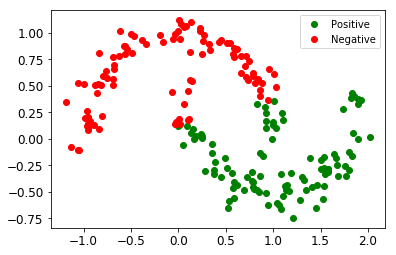

In [109]:
y_pred_idx = y_pred.reshape(-1)
plt.plot(X_test[y_pred_idx,1],X_test[y_pred_idx,2],'go',label = 'Positive')
plt.plot(X_test[~y_pred_idx,1],X_test[~y_pred_idx,2],'ro',label = 'Negative')
plt.legend()
plt.show()


In [110]:
X_train_enhanced = np.c_[X_train,
                        np.square(X_train[:,1]),
                        np.square(X_train[:,2]),
                        X_train[:,1]**3,
                        X_train[:,2]**3]
X_test_enhanced = np.c_[X_test,
                        np.square(X_test[:,1]),
                        np.square(X_test[:,2]),
                        X_test[:,1]**3,
                        X_test[:,2]**3]


In [111]:
X_train_enhanced[:5]

array([[ 1.00000000e+00, -5.14696757e-02,  4.44198631e-01,
         2.64912752e-03,  1.97312424e-01, -1.36349734e-04,
         8.76459084e-02],
       [ 1.00000000e+00,  1.03201691e+00, -4.19741157e-01,
         1.06505890e+00,  1.76182639e-01,  1.09915879e+00,
        -7.39511049e-02],
       [ 1.00000000e+00,  8.67891864e-01, -2.54827114e-01,
         7.53236288e-01,  6.49368582e-02,  6.53727646e-01,
        -1.65476722e-02],
       [ 1.00000000e+00,  2.88850997e-01, -4.48668621e-01,
         8.34348982e-02,  2.01303531e-01,  2.41002535e-02,
        -9.03185778e-02],
       [ 1.00000000e+00, -8.33439108e-01,  5.35056649e-01,
         6.94620746e-01,  2.86285618e-01, -5.78924095e-01,
         1.53179024e-01]])

In [112]:
reset_graph()

In [144]:
def logistic_regression(X, y, initializer=None, seed=42, learning_rate=0.01):
    n_input_including_bias = int(X.get_shape()[1])
    with tf.name_scope('logistic_regression'):
        with tf.name_scope('model'):
            if initializer is None:
                initializer =tf.random_uniform([n_input_including_bias,1],-1.0,1.0,seed =seed)
            theta = tf.Variable(initializer,name = 'theta')
            logits = tf.matmul(X,theta,name='logits')
            y_proba = tf.sigmoid(logits)
        with tf.name_scope('train'):
            loss = tf.losses.log_loss(y,y_proba,scope ='loss')
            optimizer = tf.train.GradientDescentOptimizer(learning_rate= learning_rate)
            training_op = optimizer.minimize(loss)
            loss_summary = tf.summary.scalar('log_loss',loss)
        with tf.name_scope('init'):
            init = tf.global_variables_initializer()
        with tf.name_scope('save'):
            saver = tf.train.Saver()
        return y_proba,loss,training_op,loss_summary,init,saver
            


In [145]:
from datetime import datetime

def log_dir(prefix = ''):
    now =datetime.utcnow().strftime('%Y%m%d%H%M%S')
    root_logidr = 'tf_logs'
    if prefix:
        prefix +='-'
    name = prefix +'run-' + now
    return '{}/{}'.format(root_logidr,name)

In [146]:
n_inputs =2+4
logdir = log_dir('logreg')

X = tf.placeholder(tf.float32,shape=(None,n_inputs+1),name = 'X')
y = tf.placeholder(tf.float32,shape =(None,1),name = 'y')

y_proba,loss,training_op,loss_summary,init,saver = logistic_regression(X,y)
file_write = tf.summary.FileWriter(logdir,tf.get_default_graph())

In [170]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m/batch_size))

checkpoint_path ='/tmp/my_logreg_model.ckpt'
checkpoint_epoch_path = checkpoint_path+'.epoch'
final_model_path = './my_logreg_model'

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        with open(checkpoint_epoch_path,'rb') as f:
            start_opoch = int(f.read())
        print('Training was interrupted. Continuing at epoch ',start_opoch)
        saver.restore(sess,checkpoint_path)
    else:
        start_opoch = 0
        sess.run(init)
    for epoch in range(start_opoch,n_epochs):
        for batch_index in range(n_batches):
            X_batch,y_batch = random_batch(X_train_enhanced,y_train,batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val,summary_str = sess.run([loss ,loss_summary],
                                        feed_dict ={X:X_test_enhanced,y:y_test})
        file_write.add_summary(summary_str,epoch)
        if epoch%500==0:
            print('Epoch:',epoch,'\tLoss',loss_val)
            saver.save(sess,checkpoint_path)
            with open(checkpoint_epoch_path,'wb') as f:
                f.write(b'%d'%(epoch+1))
    
    saver.save(sess,final_model_path)
    y_proba_val = y_proba.eval(feed_dict ={X:X_test_enhanced,y:y_test})
    os.remove(checkpoint_epoch_path)
        
        

Training was interrupted. Continuing at epoch  1501
INFO:tensorflow:Restoring parameters from /tmp/my_logreg_model.ckpt
Epoch: 2000 	Loss 0.084552824
Epoch: 2500 	Loss 0.07493747
Epoch: 3000 	Loss 0.06792013
Epoch: 3500 	Loss 0.06252397
Epoch: 4000 	Loss 0.058237314
Epoch: 4500 	Loss 0.05475718
Epoch: 5000 	Loss 0.05186018
Epoch: 5500 	Loss 0.049406234
Epoch: 6000 	Loss 0.047332708
Epoch: 6500 	Loss 0.045510884
Epoch: 7000 	Loss 0.043883033
Epoch: 7500 	Loss 0.04244939
Epoch: 8000 	Loss 0.041191187
Epoch: 8500 	Loss 0.040040754
Epoch: 9000 	Loss 0.038988747
Epoch: 9500 	Loss 0.03804117
Epoch: 10000 	Loss 0.037181035


In [156]:
y_pred = (y_proba_val>=0.5)

In [157]:
precision_score(y_test,y_pred)

0.9797979797979798

In [159]:
recall_score(y_test,y_pred)

0.9797979797979798

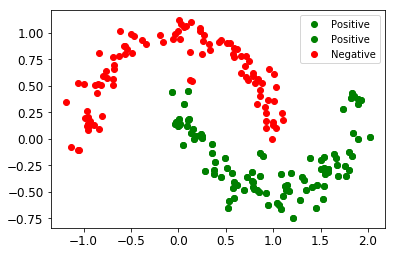

In [161]:
y_pred_idx = y_pred.reshape(-1)
plt.plot(X_test[y_pred_idx,1],X_test[y_pred_idx,2],'go',label = 'Positive')
plt.plot(X_test[~y_pred_idx,1],X_test[~y_pred_idx,2],'ro',label ='Negative')
plt.legend()
plt.show()

In [171]:
from scipy.stats import reciprocal

n_search_iterations = 10

for search_iteration in range(n_search_iterations):
    batch_size = np.random.randint(1, 100)
    learning_rate = reciprocal(0.0001, 0.1).rvs(random_state=search_iteration)

    n_inputs = 2 + 4
    logdir = log_dir("logreg")
    
    print("Iteration", search_iteration)
    print("  logdir:", logdir)
    print("  batch size:", batch_size)
    print("  learning_rate:", learning_rate)
    print("  training: ", end="")

    reset_graph()

    X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
    y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

    y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(
        X, y, learning_rate=learning_rate)

    file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

    n_epochs = 10001
    n_batches = int(np.ceil(m / batch_size))

    final_model_path = "./my_logreg_model_%d" % search_iteration

    with tf.Session() as sess:
        sess.run(init)

        for epoch in range(n_epochs):
            for batch_index in range(n_batches):
                X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
                sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X: X_test_enhanced, y: y_test})
            file_writer.add_summary(summary_str, epoch)
            if epoch % 500 == 0:
                print(".", end="")

        saver.save(sess, final_model_path)

        print()
        y_proba_val = y_proba.eval(feed_dict={X: X_test_enhanced, y: y_test})
        y_pred = (y_proba_val >= 0.5)
        
        print("  precision:", precision_score(y_test, y_pred))
        print("  recall:", recall_score(y_test, y_pred))

Iteration 0
  logdir: tf_logs/logreg-run-20181202125036
  batch size: 94
  learning_rate: 0.004430375245218265
  training: .....................
  precision: 0.9797979797979798
  recall: 0.9797979797979798
Iteration 1
  logdir: tf_logs/logreg-run-20181202125131
  batch size: 31
  learning_rate: 0.0017826497151386947
  training: .....................
  precision: 0.9797979797979798
  recall: 0.9797979797979798
Iteration 2
  logdir: tf_logs/logreg-run-20181202125356
  batch size: 56
  learning_rate: 0.00203228544324115
  training: .....................
  precision: 0.9696969696969697
  recall: 0.9696969696969697
Iteration 3
  logdir: tf_logs/logreg-run-20181202125517
  batch size: 51
  learning_rate: 0.004491523825137997
  training: .....................
  precision: 0.9797979797979798
  recall: 0.9797979797979798
Iteration 4
  logdir: tf_logs/logreg-run-20181202125649
  batch size: 62
  learning_rate: 0.07963234721775589
  training: .....................
  precision: 0.9801980198019802
